In [1]:
#stock price detection(regression)-RNN(Recurent Nural Network)
#1st-4th layout: relu
#output layout: sigmoid

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#------data processing

In [4]:
#importing the trainig_set data
#1. read the traing_set data
dataset_train = pd.read_csv('Google_Stock_price_train.csv')
#2. select the necessary colum and make np array(.value)
train_set = dataset_train.iloc[:, 1:2].values

In [5]:
#feature scaling(MinMaxScaler):transform and normarize the data to 0-1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)

In [6]:
#decide the time_step(how many data and 1 output)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
#make them np array
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
#reshaping 
#make X_train to 3D. x/y/z
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
#------building model(RNN)

In [9]:
#import Keras libraries/packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
#initialize the model(RNN) 
regressor = Sequential()

In [11]:
#1st LSTM layer + dropout layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [12]:
#2nd LSTM layer + dropout layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
#3rd LSTM layer + dropout layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
#4th LSTM layer  + dropout layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [15]:
#output layer 
regressor.add(Dense(units = 1))

In [16]:
#------training model(RNN)

In [17]:
#compiling RNN(optimizer, loss)
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
#fit RNN to training(x/y_train, epocs, batch_sizes)
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 8s 206ms/step - loss: 0.0443
Epoch 2/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 6s 159ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0043
Epoch 13/100


38/38 [==============================] - 7s 177ms/step - loss: 0.0016
Epoch 100/100
38/38 [==============================] - 9s 225ms/step - loss: 0.0014


In [19]:
#------make the prediction

In [20]:
#get the ground truth(real stock price)
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [21]:
#predict the y_test()
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

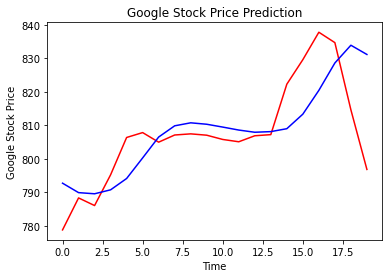

In [22]:
#------visualizing the result
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend
plt.show()